In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# dataset path
PATH = 'CrochetDetection.v1i.yolov8'
mascaras = 'train/labels'
os.mkdir(mascaras)


In [4]:
# lists labels files in test split (TODO: add train,validation...)
file_names = [f[:-4] for f in os.listdir(PATH+'/train/labels') if f.endswith('.txt')] # f[:-4] guarda el nombre del archivo sin '.txt'

file_names

['122_LB_0_HD_B_AS_F_N_png.rf.940f62a37935811500dd14f3ce1be9b5',
 '132_Y_1_HD_B_NS_B_N_png.rf.b029ea19e5aa6886cb1642f8e01596c8',
 '133_Y_1_HD_B_N_B_N_png.rf.900996c045112bb9fc6b483df33bba91',
 '97_DB_0_DC_R_N_F_N_png.rf.ac6a0adce606e56bb6fc4255f23e9cb2',
 '206_O_0_SC_G_N_F_N_png.rf.aadfae446ad6c282ffddb91cd87c3cca',
 '212_LB_0_HD_G_A_B_N_png.rf.690e60d39f58d1917f77ffc2b6538214',
 '201_C_2_HD_G_AS_F_N_png.rf.06b09ec68158c3e6d8b9df1b69c4e083',
 '131_Y_1_HD_B_NS_B_N_png.rf.c36f92d7b8f931ff6e8d0b8dd4567c07',
 '59_LB_0_HD_W_AS_B_N_png.rf.3ec8430ae98f44cd5ddae6c4c7d4b68c',
 '67_Y_1_HD_W_AS_B_N_png.rf.eecaac81dfa94ec049b3e62c0e67cdfe',
 '85_LB_0_HD_R_N_F_N_png.rf.dcb81061e3ce7e4810e225ee7f4d6f69',
 '114_DB_0_DC_B_AS_F_N_png.rf.f79467f97b26225ccc035f30b5ea78f8',
 '68_Y_1_HD_W_NS_B_N_png.rf.c50182e463abd24a4e6e92c3e5bbcdc2',
 '107_C_2_HD_R_N_F_N_png.rf.2896e890b4613cbfc87ea1de232a3cc5',
 '42_O_0_SC_W_A_F_N_png.rf.338bdac47dcfef13f83fc29954aa8a88',
 '151_C_2_HD_B_AS_F_N_png.rf.e6f2e1cd0ee4763064

In [7]:
# TODO: Roboflow configuration (not resized, all images have the same size)

In [5]:
#CODE TO GENERATE A MASK FOR EACH SEGMENTATION

for f in file_names:
    #print(f)
    # load image
    img = cv2.imread(PATH+'/train/images/'+f+'.jpg')

    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.imshow(img)
    #plt.show()
    img_h, img_w, _ = img.shape
    
    #Load label file
    txt_file = open(PATH+'/train/labels/'+f+'.txt')

    lines = txt_file.readlines()
    for line in lines:
        line_info = line[:-1].split(' ') #erase \n symbol and split y space
        category = int(line_info[0])
        points = np.array(line_info[1:], np.float64)
        points = points.reshape((int(points.shape[0]/2)),2)
        points[:,0] = points[:,0]*img_w
        points[:,1] = points[:,1]*img_h
        
        #Generate individual mask
        # print(category)
        mask = np.zeros((img_h, img_w))
        cv2.drawContours(mask, [points.astype(np.int32)], -1, 1, -1)
        plt.imshow(mask, cmap='gray')
        #plt.show()
        
    print('****************************')

: 

: 

DepthViewer_Left_35355388_1242_20-03-2023-11-17-45_png.rf.fa9fc9c1205bfea6f9fc98b218bdfebe


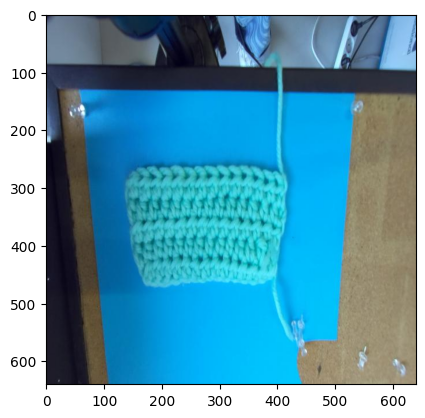

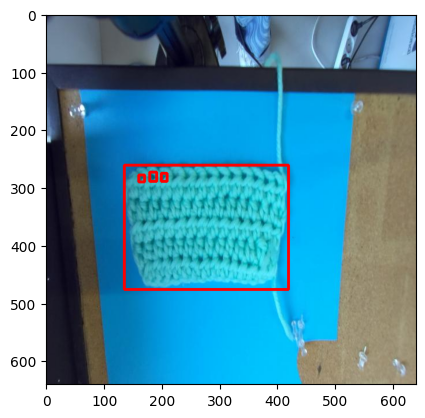

****************************


In [ ]:
#CODE TO GET Bounding Box

for f in file_names:
    #print(f)
    # load image
    img = cv2.imread(PATH+'/train/images/'+f+'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.imshow(img)
    #plt.show()
    img_h, img_w, _ = img.shape
    
    #Load label file
    txt_file = open(PATH+'/train/labels/'+f+'.txt')
    lines = txt_file.readlines()
    img_bb = img.copy()
    for line in lines:
        line_info = line[:-1].split(' ') #quit \n symbol and split y space
        category = int(line_info[0])
        points = np.array(line_info[1:], np.float64)
        points = points.reshape((int(points.shape[0]/2)),2)
        points[:,0] = points[:,0]*img_w
        points[:,1] = points[:,1]*img_h

        #Get Bounding box
        x_bb,y_bb,w_bb,h_bb = cv2.boundingRect(points.astype(np.int32))
        cv2.rectangle(img_bb, (x_bb,y_bb), (x_bb+w_bb,y_bb+h_bb), (255,0,0), 3)
        
    plt.imshow(img_bb)
    #plt.show()
    #print('****************************')

DepthViewer_Left_35355388_1242_20-03-2023-11-17-45_png.rf.fa9fc9c1205bfea6f9fc98b218bdfebe


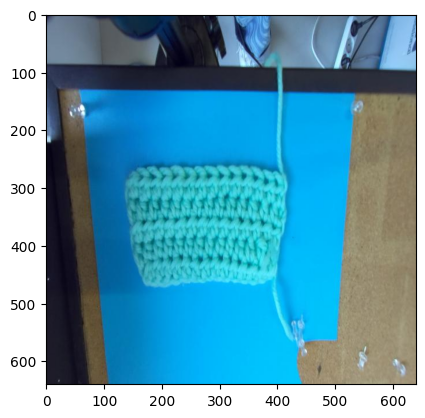

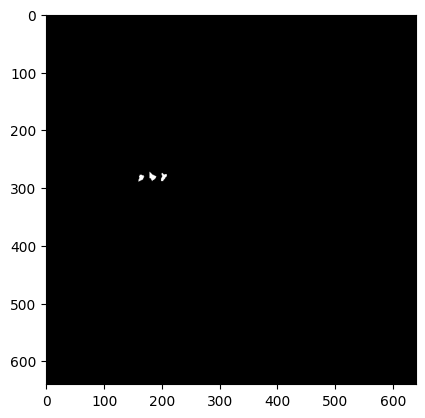

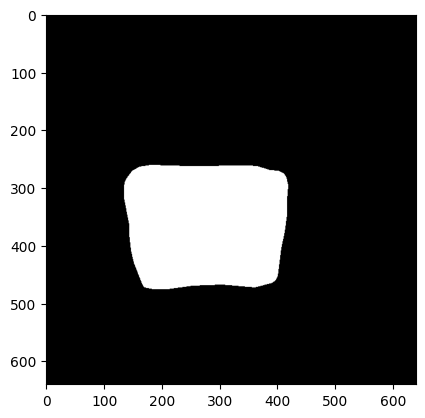

****************************


In [ ]:
#CODE TO GENERATE A MASK BY CATEGORY (2 IN TOTAL)

categories = 2

for f in file_names:
    print(f)
    # load image
    img = cv2.imread(PATH+'/train/images/'+f+'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.imshow(img)
    plt.show()
    img_h, img_w, _ = img.shape
    
    #Load label file
    txt_file = open(PATH+'/train/labels/'+f+'.txt')
    lines = txt_file.readlines()
    
    # Generate mask by category
    masks = np.zeros((categories, img_h, img_w))
    for line in lines:
        line_info = line[:-1].split(' ') #quit \n symbol and split y space
        category = int(line_info[0])
        points = np.array(line_info[1:], np.float64)
        points = points.reshape((int(points.shape[0]/2)),2)
        points[:,0] = points[:,0]*img_w
        points[:,1] = points[:,1]*img_h
        
        #Draw mask        
        cv2.drawContours(masks[category,:,:], [points.astype(np.int32)], -1, 1, -1)
    
    #plot masks
    for i in range(categories):
        plt.imshow(masks[i,:,:], cmap='gray')
        plt.show()
        
    print('****************************')

DepthViewer_Left_35355388_1242_20-03-2023-11-17-45_png.rf.fa9fc9c1205bfea6f9fc98b218bdfebe


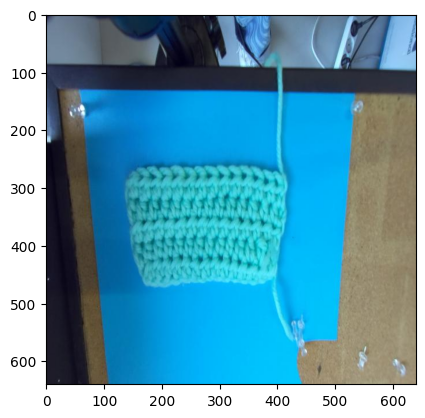

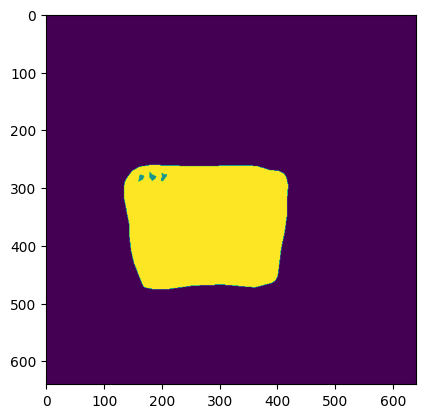

****************************


In [ ]:
#CODE TO GENERATE A MASK (Semantic segmentation like Unet)

categories = 2

for f in file_names:
    #print(f)
    # load image
    img = cv2.imread(PATH+'/train/images/'+f+'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.imshow(img)
    #plt.show()
    img_h, img_w, _ = img.shape
    
    #Load label file
    txt_file = open(PATH+'/train/labels/'+f+'.txt')
    lines = txt_file.readlines()
    
    # Generate mask by category
    masks = np.zeros((categories, img_h, img_w))
    for line in lines:
        line_info = line[:-1].split(' ') #quit \n symbol and split y space
        category = int(line_info[0])
        points = np.array(line_info[1:], np.float64)
        points = points.reshape((int(points.shape[0]/2)),2)
        points[:,0] = points[:,0]*img_w
        points[:,1] = points[:,1]*img_h
        
        #Draw mask        
        cv2.drawContours(masks[category,:,:], [points.astype(np.int32)], -1, 1, -1)
    
    #Join masks in one mask, taking into account overlapping areas
    mask = np.zeros((img_h, img_w))
    for i in range(categories):
        mask = np.where((masks[i,:,:] == 1) & (mask == 0), (i+1), mask)
    
    #plot masks
    plt.imshow(mask)
    #plt.show()
    cv2.imwrite(os.path.join(mascaras, f+'.png'), mask)

        
    #print('****************************')